In [1]:
!pip install librosa


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Exploratary data analysis:-

filename = 'UrbanSound8K/audio/fold1/101415-3-0-2.wav'

In [4]:
import librosa
data,sample_rate = librosa.load(filename)

In [5]:
data

array([-0.00011485, -0.00017083, -0.00017736, ..., -0.04609928,
       -0.04609471, -0.05099387], dtype=float32)

In [6]:
sample_rate

22050

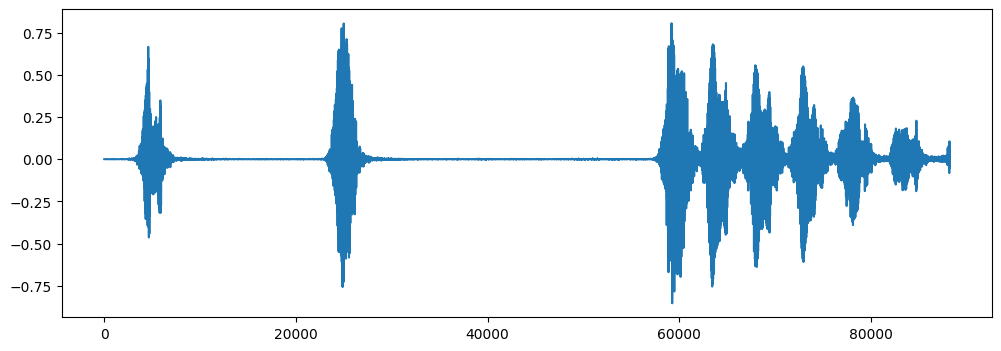

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(data)

In [8]:
import pandas as pd

In [9]:
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

In [10]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [11]:
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [12]:
# now use mfcc to extract important features

In [15]:
mfcc = librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)

In [16]:
mfcc

array([[-5.2506586e+02, -5.1955695e+02, -5.1864276e+02, ...,
        -4.3568549e+02, -3.8558670e+02, -3.0779324e+02],
       [ 9.1999226e+00,  1.6759441e+01,  1.8103909e+01, ...,
         1.1375923e+02,  1.4776443e+02,  1.3558249e+02],
       [ 8.8355560e+00,  1.5750109e+01,  1.7259296e+01, ...,
         6.4274643e+01,  4.9179771e+01,  3.2849548e+01],
       ...,
       [ 4.3309483e-01, -3.5408895e+00, -4.8356495e+00, ...,
        -5.2699113e+00, -1.2849206e-01,  7.5349283e-01],
       [ 4.4520700e-01, -3.2774832e+00, -4.6472917e+00, ...,
        -3.4224052e+00,  3.9007008e+00,  5.5314600e-01],
       [ 3.5697129e-01, -2.9899054e+00, -4.4125957e+00, ...,
        -2.6713321e+00,  2.7894552e+00,  1.4205617e-01]], dtype=float32)

In [17]:
mfcc.size

6920

In [18]:
# now hr file ka important feature extract convert df and devide dependent and independent and then train

In [19]:
def feature_extractor(file):
    audio,sample_rate = librosa.load(file)
    mfcc_features = librosa.feature.mfcc(y=audio , sr = sample_rate , n_mfcc=40)
    mfcc_features_scaled = np.mean(mfcc_features.T , axis = 0)
    return  mfcc_features_scaled

In [20]:
import numpy as np
audio_path = 'UrbanSound8K/audio/'

In [21]:
from tqdm import tqdm
import os
extracted_feature = []

for index,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data = feature_extractor(file_name)
    extracted_feature.append([data ,final_class_labels])
    
    
    

3554it [02:06, 28.41it/s]C:\Users\Nitin Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [05:06, 25.66it/s]C:\Users\Nitin Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8328it [05:06, 28.09it/s]C:\Users\Nitin Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [05:23, 27.02it/s]


In [22]:
extracted_feature

[[array([-2.1193698e+02,  6.2581207e+01, -1.2281315e+02, -6.0745281e+01,
         -1.3893760e+01, -2.9789835e+01, -3.9788749e+00,  1.1682742e+01,
          1.2963828e+01,  8.3364210e+00, -6.5298190e+00, -2.9961064e+00,
         -1.2887950e+01,  5.8859324e+00, -2.4752254e+00, -4.4083118e+00,
         -1.5014476e+01, -9.4399726e-01, -2.5799103e+00,  6.0982966e+00,
         -1.0786229e+01, -8.0634775e+00,  5.8440900e+00, -3.1225376e+00,
         -5.9842277e+00, -7.9944745e-02, -3.6870894e+00,  4.7476764e+00,
         -6.5300946e+00, -5.0838842e+00,  4.8772603e-01,  7.5108857e+00,
         -8.8536024e-01,  2.3938141e+00, -6.3923717e+00, -2.1318593e+00,
          2.2760148e+00, -7.9108363e-01, -1.5400676e+00,  1.3211496e+00],
        dtype=float32),
  'dog_bark'],
 [array([-4.1700519e+02,  9.9336624e+01, -4.2995586e+01,  5.1073326e+01,
          9.8537779e+00,  7.9696927e+00,  1.1197088e+01,  1.9291176e+00,
          7.0303969e+00,  4.2702279e+00, -3.5847256e+00,  1.3890946e+01,
         -2

In [23]:
extracted_feature_df = pd.DataFrame(extracted_feature , columns = ['feature' , 'class'])

In [24]:
extracted_feature_df.head()

,feature,class
0,"[-211.93698, 62.581207, -122.81315, -60.74528,...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578068, 43.19586, ...",children_playing
3,"[-406.47922, 91.1966, -25.043558, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.658787, 50.690277,...",children_playing


In [25]:
# split it into dependent and independent feature

In [26]:
X = np.array(extracted_feature_df['feature'].to_list())
y=np.array(extracted_feature_df['class'].tolist())
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [27]:
X

array([[-2.11936981e+02,  6.25812073e+01, -1.22813148e+02, ...,
        -7.91083634e-01, -1.54006755e+00,  1.32114959e+00],
       [-4.17005188e+02,  9.93366241e+01, -4.29955864e+01, ...,
         1.70679843e+00, -1.79360628e+00,  1.76138449e+00],
       [-4.52393158e+02,  1.12362534e+02, -3.75780678e+01, ...,
         3.80801368e+00, -9.00556520e-02,  8.69102180e-01],
       ...,
       [-2.97315338e+02,  1.02090263e+02, -3.67510796e+01, ...,
        -1.62244558e+00,  1.25214446e+00,  9.13216591e+00],
       [-3.36923859e+02,  1.15313896e+02, -4.48470955e+01, ...,
        -6.76911306e+00, -2.85838675e+00,  6.95349169e+00],
       [-3.07417603e+02,  8.33067322e+01, -2.57565117e+01, ...,
         8.39591444e-01, -1.17747602e+01, -5.59599781e+00]], dtype=float32)

In [28]:


from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

labelencoder = LabelEncoder()

y = to_categorical(labelencoder.fit_transform(y))

In [29]:
class_labels = list(labelencoder.classes_)
print(class_labels)


['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']


In [30]:
y[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [31]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state = 0)

In [32]:
X_train.shape

(6985, 40)

In [33]:
X_test.shape

(1747, 40)

In [34]:
# model creation 
!pip install tensorflow


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
num_labels=y.shape[1]
num_labels

10

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(40,)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(num_labels, activation='softmax'))

In [37]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint


In [39]:
checkpoint = ModelCheckpoint(
    filepath='best_model.h5',         # file to save the best model
    monitor='val_accuracy',           # metric to monitor
    verbose=1,                        # print info when saving
    save_best_only=True,              # only save best weights
    mode='max'                        # 'max' because higher val_accuracy is better
)


In [41]:
models = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=500,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint]
)


Epoch 1/500
210/219 [===========================>..] - ETA: 0s - loss: 0.1933 - accuracy: 0.9308
Epoch 1: val_accuracy did not improve from 0.93818
219/219 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9304 - val_loss: 0.2357 - val_accuracy: 0.9262
Epoch 2/500
211/219 [===========================>..] - ETA: 0s - loss: 0.2077 - accuracy: 0.9258
Epoch 2: val_accuracy did not improve from 0.93818
219/219 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9254 - val_loss: 0.2383 - val_accuracy: 0.9262
Epoch 3/500
211/219 [===========================>..] - ETA: 0s - loss: 0.1959 - accuracy: 0.9335
Epoch 3: val_accuracy did not improve from 0.93818
219/219 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9337 - val_loss: 0.2373 - val_accuracy: 0.9307
Epoch 4/500
207/219 [===========================>..] - ETA: 0s - loss: 0.2056 - accuracy: 0.9275
Epoch 4: val_accuracy did not improve from 0.93818
219/219 [======

In [42]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load the trained model
model = load_model('best_model.h5')

# 2. Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 3. Predict class probabilities
y_pred_probs = model.predict(X_test)

# 4. Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# 5. Print classification report
print("\nClassification Report:")
cm=(classification_report(y_true, y_pred))
print(cm)
# 6. Optional: Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))



55/55 [==============================] - 0s 919us/step - loss: 0.2196 - accuracy: 0.9433
Test Loss: 0.2196
Test Accuracy: 0.9433
55/55 [==============================] - 0s 842us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       195
           1       0.98      0.90      0.94        91
           2       0.86      0.95      0.90       205
           3       0.93      0.90      0.92       182
           4       0.96      0.94      0.95       202
           5       0.97      0.99      0.98       216
           6       1.00      0.90      0.95        87
           7       0.95      0.96      0.95       187
           8       0.98      0.96      0.97       199
           9       0.91      0.89      0.90       183

    accuracy                           0.94      1747
   macro avg       0.95      0.94      0.94      1747
weighted avg       0.94      0.94      0.94      1747


Confusion Matrix:
[[195   0   0 